# Bangla Handwritten Digits Classification
Using With Shallow Nural Network

*Dataset Source: [Bengali.ai](https://bengali.ai/)*

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder

%matplotlib inline

### Loading and setting up the dataset

In [3]:
# Loading the dataset
X_train = pd.read_json('./dataset/train_images.json', ' ').to_numpy().T
Y_train = pd.read_json('./dataset/train_labels.json', ' ').to_numpy()
X_test = pd.read_json('./dataset/test_images.json', ' ').to_numpy().T
Y_test = pd.read_json('./dataset/test_labels.json', ' ').to_numpy()

# Setting up the label
ohe_y = OneHotEncoder()
Y_train = ohe_y.fit_transform(Y_train).toarray().T
Y_test = ohe_y.fit_transform(Y_test).toarray().T

# Checking the shape of the dataset
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

# Normalizing the dataset
X_test = X_test / 255
X_train = X_train / 255

(784, 23824)
(10, 23824)
(784, 2653)
(10, 2653)


[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]


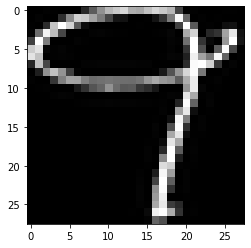

In [4]:
# Checking up some data
index = 334
temp_x_data = X_train.T[index].reshape(28, 28)
temp_y_data = Y_train.T[index]

plt.imshow(temp_x_data, cmap='gray')
print(temp_y_data)

In [5]:
# Getting shapes and sizes
m_train = Y_train.shape[1]
m_test = Y_test.shape[1]

# Size of input and output
n_x = X_test.shape[0]
n_y = Y_test.shape[0]

print('Number of training data: ' + str(m_train))
print('Number of testing data: ' + str(m_test))

print('Number of input params: ' + str(n_x))
print('Number of output params: ' + str(n_y))

Number of training data: 23824
Number of testing data: 2653
Number of input params: 784
Number of output params: 10


### Necessary functions for Nural Network

In [6]:
# Sigmoid Function
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# Derivative of sigmoid function
def sigmoid_prime(x):
    return sigmoid(x) * (1 - sigmoid(x))

# Derivative of tanh function
def tanh_prime(x):
    return 1 - np.pow(np.tanh(x), 2)

### Now it's time for Neural net

In [7]:
# Initialize weights and biases
def init_params(n_x, n_h, n_y):
    W1 = np.random.randn(n_h, n_x) * 0.01
    b1 = np.zeros((n_h, 1))
    W2 = np.random.randn(n_y, n_h) * 0.01
    b2 = np.zeros((n_y, 1))
    
    params = {
        "W1": W1,
        "b1": b1,
        "W2": W2,
        "b2": b2
    }
    
    return params

### Forward Propagation

In [8]:
def forward_prop(X, params):
    W1 = params["W1"]
    W2 = params["W2"]
    b1 = params["b1"]
    b2 = params["b2"]
    
    Z1 = np.dot(W1, X) + b1
    A1 = np.tanh(Z1)
    Z2 = np.dot(W2, A1) + b2
    A2 = sigmoid(Z2)
    
    cache = {
        "Z1": Z1,
        "A1": A1,
        "Z2": Z2,
        "A2": A2
    }
    
    return A2, cache

In [9]:
params = init_params(n_x, 50, n_y)
A2, cache = forward_prop(X_train, params)

In [10]:
# Calculating the cost
def compute_cost(A2, Y):
    m = Y.shape[1]
    logprobs = (Y * np.log(A2)) + ((1 - Y) * np.log(1 - A2))
    cost = - np.sum(logprobs) / m
    return cost

In [11]:
cost = compute_cost(A2, Y_train)
print(cost)

6.933304203366307


In [12]:
# The back propagation function
def back_prop(params, cache, X, Y):
    m = X.shape[1]
    
    W1 = params["W1"]
    W2 = params["W2"]
    
    A1 = cache["A1"]
    A2 = cache["A2"]
    
    dZ2 = A2 - Y
    dW2 = (1 / m) * np.dot(dZ2, A1.T)
    db2 = (1 / m) * np.sum(dZ2, axis=1, keepdims=True)
    dZ1 = np.dot(W2.T, dZ2) * (1- np.power(A1, 2))
    dW1 = (1 / m) * np.dot(dZ1, X.T)
    db1 = (1 / m) * np.sum(dZ1, axis=1, keepdims=True)
    
    grads = {
        "dW1": dW1,
        "db1": db1,
        "dW2": dW2,
        "db2": db2
    }
    
    return grads

In [13]:
grads = back_prop(params, cache, X_train, Y_train)

In [14]:
# Use gradiants to update parameters
def update_params(params, grads, learning_rate=0.05):
    W1 = params["W1"]
    W2 = params["W2"]
    b1 = params["b1"]
    b2 = params["b2"]
    
    dW1 = grads["dW1"]
    db1 = grads["db1"]
    dW2 = grads["dW2"]
    db2 = grads["db2"]
    
    W1 = W1 - learning_rate * dW1
    b1 = b1 - learning_rate * db1
    W2 = W2 - learning_rate * dW2
    b2 = b2 - learning_rate * db2
    
    parameters = {
        "W1": W1,
        "b1": b1,
        "W2": W2,
        "b2": b2
    }
    
    return parameters

In [15]:
update_params(params, grads)

{'W1': array([[-0.01682112,  0.00266626,  0.0143246 , ...,  0.00492806,
          0.00078815, -0.01450614],
        [-0.00591965,  0.01258518, -0.00605391, ..., -0.01265559,
          0.00884261,  0.00124575],
        [ 0.00365298, -0.00513976,  0.00793734, ..., -0.00420375,
         -0.00297382,  0.01336856],
        ...,
        [-0.01212716, -0.01575354,  0.00458641, ...,  0.01926161,
         -0.0013448 , -0.02881942],
        [-0.00519822, -0.00664663, -0.00521573, ...,  0.00350898,
         -0.00058103,  0.00789649],
        [ 0.00076688,  0.01807235, -0.0135538 , ...,  0.00016054,
         -0.00120794, -0.00854753]]),
 'b1': array([[-2.13857198e-04],
        [-9.66768654e-04],
        [-5.56283852e-04],
        [ 7.87882194e-04],
        [ 1.71156564e-04],
        [ 2.68839324e-04],
        [-6.20015820e-04],
        [-9.06412729e-04],
        [ 1.70635499e-04],
        [-4.82710208e-05],
        [ 7.53821057e-04],
        [-1.22359021e-03],
        [-8.98763742e-04],
        [ 

In [16]:
# The model for the neural net
def nn_model(X, Y, n_h=100, n_iter=5000, learning_rate=0.05, print_cost=True):
    n_x = X.shape[0]
    n_y = Y.shape[0]
    
    params = init_params(n_x, n_h, n_y)
    
    for i in range(0, n_iter):
        A2, cache = forward_prop(X, params)
        cost = compute_cost(A2, Y)
        grads = back_prop(params, cache, X, Y)
        params = update_params(params, grads, learning_rate)
        
        if print_cost and i % 200 == 0:
            print ("Cost after iteration %i: %f" %(i, cost))
            
    return params

In [ ]:
print("h=100, iter=5000, lr=0.1")
params2 = nn_model(X_train, Y_train, n_h=100, n_iter=10000, learning_rate=0.1)

h=100, iter=5000, lr=0.1
Cost after iteration 0: 6.934824
Cost after iteration 200: 0.939684
Cost after iteration 400: 0.573877
Cost after iteration 600: 0.465685
Cost after iteration 800: 0.406531
Cost after iteration 1000: 0.365922
Cost after iteration 1200: 0.334941
Cost after iteration 1400: 0.309847
Cost after iteration 1600: 0.288707
Cost after iteration 1800: 0.270404
Cost after iteration 2000: 0.254253
Cost after iteration 2200: 0.239811
Cost after iteration 2400: 0.226775
Cost after iteration 2600: 0.214923


In [ ]:
print("h=200, iter=15000, lr=0.05")
params3 = nn_model(X_train, Y_train, n_h=200, n_iter=15000)

In [ ]:
params4 = nn_model(X_train, Y_train, n_h=200, n_iter=15000, learning_rate=0.1)

In [26]:
# Prediction
def predict(X, params):
    A2, cache = forward_prop(X, params)
#     A2 = (A2 == np.max(A2, axis=0))
    return A2

In [27]:
A2 = predict(X_test, params)
print(A2.T)

[[6.45921504e-04 2.28076450e-04 6.63638043e-04 ... 9.95208081e-01
  5.72496343e-08 4.60119711e-04]
 [9.96190343e-01 2.27250914e-04 5.60155787e-05 ... 7.70374924e-03
  2.38284440e-06 6.61506125e-05]
 [1.80873052e-08 2.07523671e-03 5.41847087e-05 ... 2.88671610e-06
  1.33533285e-03 9.30239349e-01]
 ...
 [7.50676050e-08 2.57045211e-05 4.01849753e-04 ... 7.16833520e-03
  2.18571461e-05 4.44437302e-05]
 [7.67974170e-03 8.20349689e-01 3.48966889e-03 ... 1.10206212e-04
  1.17433909e-07 1.44398644e-01]
 [5.33011081e-01 1.43195260e-02 9.13180954e-07 ... 2.61526486e-06
  2.54657518e-05 1.57573182e-02]]
